# Building Model

#### Importing libraries

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

#### Importing constants

In [112]:
from src.constants_and_functions.constants import models_saving_folder

#### Loading Data

In [113]:
wine_statistics = pd.read_csv('\\Datasets and Projects\\WINE QUALITY\\Wine\\Data\\Processed\\Wine statistics(processed data).csv')
wine_statistics.head()

,Name,Year,Rating,Verdict,Color,Intensity,Aroma,Sweetness,Acidity,Alcohol,Tannin,Balance,Finish,Aftertaste
0,"EQUINOX, Luchineasa",2020,90.7,nice,9.0,9.0,9.4,9.0,8.9,8.9,8.9,8.9,8.9,8.4
1,"BAHU WINERY, Sauvignon Blanc",2020,89.8,nice,9.4,9.4,9.3,8.9,8.3,8.2,8.2,8.2,8.2,8.2
2,"CRAMA BAUER, Feteasca Alba",2019,91.9,fine,9.6,9.6,9.5,9.1,9.1,9.1,9.0,9.0,9.0,8.9
3,"BOUCHIÉ-CHATELLIER, Argile à Silex, Pouilly-Fumé",2019,92.8,fine,9.7,9.6,9.5,9.2,9.2,9.2,9.2,9.1,9.1,9.0
4,"RASOVA, Nud",2020,92.0,fine,9.5,9.5,9.4,9.2,9.2,9.1,9.1,9.0,9.0,9.0


## Wine rating prediction (Linear Regression Model)

In [114]:
x = wine_statistics.iloc[:, 5:].values
y = wine_statistics['Rating']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [116]:
x_train.shape, y_train.shape

((697, 9), (697,))

In [101]:
x_test.shape, y_test.shape

((175, 9), (175,))

In [102]:
model = linear_model.LinearRegression()

In [103]:
model.fit(x_train, y_train)

LinearRegression()

In [104]:
y_pred = model.predict(x_test)

In [105]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 1.57168603  1.14367492  0.48865045  0.8763241   2.15202687  1.3075243
 -0.93300493  1.33785258  1.54882786]
Intercept: 4.717132663530819
Mean squared error (MSE): 0.14
Coefficient of determination (R^2): 0.95


In [106]:
# Saving model results
current_directory=os.getcwd()
os.chdir(models_saving_folder)
filename = 'Wine Linear Regression Model.sav'
pickle.dump(model, open(filename, 'wb'))
os.chdir(current_directory)

In [107]:
print(np.array(y_test))

[92.8 91.1 90.4 90.2 89.9 87.5 91.3 88.7 88.5 92.5 89.6 93.  90.4 89.7
 88.5 90.7 90.3 89.7 91.1 91.3 92.  93.3 89.7 91.4 92.8 89.2 90.6 90.2
 89.5 88.9 89.3 89.7 90.7 89.9 87.8 91.5 89.5 91.4 91.7 91.8 92.3 90.5
 90.9 91.8 93.5 91.5 93.7 87.5 94.7 90.9 93.5 90.4 90.8 92.2 90.3 89.5
 90.4 95.  90.4 90.7 91.4 90.4 91.1 93.2 87.  93.3 90.  90.3 94.7 89.2
 87.8 88.8 90.2 92.1 92.  90.5 92.7 88.7 91.5 86.9 90.5 90.6 91.4 88.7
 89.7 89.9 90.  90.8 90.  90.2 94.5 89.9 87.4 88.6 89.6 91.7 90.6 89.7
 90.8 90.7 91.  90.8 89.8 89.3 89.5 90.8 88.5 88.9 91.1 90.8 91.6 93.
 89.  92.  90.7 90.5 90.3 88.5 91.9 90.8 90.4 92.8 89.9 91.3 91.2 89.7
 89.6 89.5 86.9 89.7 89.7 91.8 89.9 90.6 88.7 90.4 89.7 92.  87.5 91.7
 90.5 90.6 95.5 90.1 91.  92.5 92.7 90.  88.  89.9 88.6 90.1 88.5 94.
 91.  92.9 91.2 90.5 91.4 91.9 88.8 89.4 88.5 90.5 90.5 91.6 87.5 91.2
 92.5 91.3 91.7 91.7 92.2 89.7 89.1]


In [108]:
print(y_pred)

[92.67943138 90.92840415 90.59785298 90.30511556 89.98249653 87.96128434
 91.48949402 88.57642613 88.06143942 91.74560785 89.63701137 92.73976029
 90.56655397 89.70514907 88.96850678 90.58415153 90.37076723 89.54459365
 90.96723796 91.29527783 92.0214554  93.33400368 89.94109985 91.50440808
 91.78612315 89.37909543 90.69287087 90.06142986 89.74351465 89.2861478
 89.74950496 89.60628079 90.71790345 89.91643161 87.76878605 91.66911322
 89.44114768 91.43806016 91.48425232 91.79276162 92.21743257 90.43715289
 91.03832733 91.79947807 93.3332985  91.33419214 93.12144924 89.53910649
 94.53411985 90.892204   92.8095444  90.28713202 90.8446903  92.11356627
 90.27784951 89.59091768 90.33199986 94.82507371 90.45825042 90.9449892
 91.4248878  90.56597655 91.2038588  92.78402193 85.74322522 93.39754756
 89.75534444 90.48912304 94.03375597 89.45487351 88.08200465 88.80962296
 90.11408498 91.94557757 91.5992922  90.31696627 92.42921658 88.98205921
 91.64666262 87.60788693 90.6734531  90.66559766 91.4

In [109]:
# Visualisation results of regression
rating_comparing = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rating_comparing = rating_comparing.head(20)

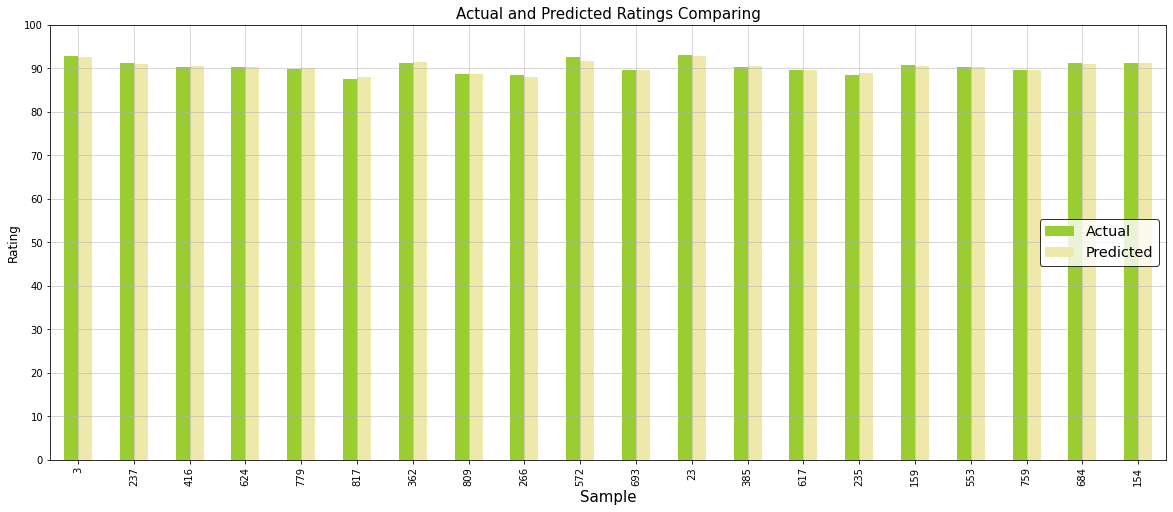

In [110]:
rating_comparing.plot(kind='bar',figsize=(20,8), color=['#9ACD32', '#EEE8AA'])

plt.title('Actual and Predicted Ratings Comparing', fontsize=15)

plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')

plt.ylabel('Rating', fontsize=12)
plt.xlabel('Sample', fontsize=15)

plt.yticks(np.arange(0, 101, 10))
plt.legend(fontsize= 'x-large', loc='center right', edgecolor = 'black')
plt.show()